## Using my new THREDDS Class script!

There are still so many things to consider to make this a working example, but it has passed the simple tests

---

Some notes to consider:

* Make dictionary for plotting arguments for each variable?

    1) Like for MSLP, certain number of levels, gaussian filtered, etc.
    
    2) Certain colorbars for specific variables
    
    .
    
    .
    
    .


* Or should there be individual methods for each type of variable, ex. make a mslp(), vorticity()...

    1) This could also incorporate being able to plot other variables on top if desired, like adding Hi/Lo's to MSLP or vorticity?
    
    2) There would need to be a check for the specific variables in each model product??
    

* Make sure each time step is appropriate for the variables
    Right now the time steps are based off forecast hour steps of specific model, but some variables with in the     models and products might vary...
    
    1) Ex: GFS and NAM have time step in incriments of 3 hours and RAP 1 hour. But any precip is usually ```X``` amount of hours behind...

In [1]:
import THREDDS_Class_Example as TD
import numpy as np

In [3]:
TD.THREDDS_Models.model_dict

{'Model:{Product:url extension}': '',
 'RAP': {'13km': 'CONUS_13km/RR_CONUS_13km',
  '20km': 'CONUS_20km/RR_CONUS_20km',
  '40km': 'CONUS_40km/RR_CONUS_40km'},
 'GFS': {'0p25_ana': 'Global_0p25deg_ana/GFS_Global_0p25deg_ana',
  '0p25': 'Global_0p25deg/GFS_Global_0p25deg',
  '0p5_ana': 'Global_0p5deg_ana/GFS_Global_0p5deg_ana',
  '0p5': 'Global_0p5deg/GFS_Global_0p5deg',
  'onedeg_ana': 'Global_onedeg_ana/GFS_Global_onedeg_ana',
  'onedeg': 'Global_onedeg/GFS_Global_onedeg',
  'Pac_20km': 'Pacific_20km/GFS_Pacific_20km',
  'PR_0p25': 'Puerto_Rico_0p25deg/GFS_Puerto_Rico_0p25deg',
  'CONUS_95km': 'CONUS_95km/GFS_CONUS_95km',
  'CONUS_80km': 'CONUS_80km/GFS_CONUS_80km',
  'CONUS_20km': 'CONUS_20km/GFS_CONUS_20km',
  'AK_20km': 'Alaska_20km/GFS_Alaska_20km'},
 'HRRR': {'CONUS_3km': 'CONUS_3km/surface/HRRR_CONUS_3km',
  'CONUS_2p5km_ana': 'CONUS_2p5km_ANA/HRRR_CONUS_2p5km_ana',
  'CONUS_2p5km': 'CONUS_2p5km/HRRR_CONUS_2p5km'},
 'GEFS': {'onedeg_ana': 'Global_1p0deg_Ensemble/members-analysis

In [5]:
thredds = TD.THREDDS_Models()

8 2020 2


In [6]:
thredds.im_save_path

'./'

The ```.get_var_info``` will bring up the NCSS Site with all available variables

In [7]:
thredds.get_var_info?

Signature: thredds.get_var_info(model, prod)
Docstring:
Reference for specific variable names needed for queue.

Opens new browser tab with NCSS variables for desired model and product
-----------------------------------------------------------------------

See model_dict() method for help

Ex args:
    Model -> RAP (Rapid Refresh)
    Product -> 13km (13km CONUS)
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [4]:
model_name = "RAP"
prod_name = "13km"

In [ ]:
thredds.get_var_info(model_name,prod_name)

In [8]:
thredds.get_model_data?

Signature: thredds.get_model_data(init_hour, model, prod, *argv)
Docstring:
Queue data from given datasets
------------------------------
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [9]:
data,model,title_prod = thredds.get_model_data("0600",model_name,prod_name,
                                               "MSLP_MAPS_System_Reduction_msl")


MSLP_MAPS_System_Reduction_msl
2020-02-08 06:00:00
Data grab complete!


In [10]:
mslp = data["MSLP_MAPS_System_Reduction_msl"][:]/100

In [11]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Originating_or_generating_Center: US National Weather Service, National Centres for Environmental Prediction (NCEP)
    Originating_or_generating_Subcenter: 0
    GRIB_table_version: 2,1
    Type_of_generating_process: Forecast
    Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre: Rapid Refresh (RAP)
    Conventions: CF-1.6
    history: Read using CDM IOSP GribCollection v3
    featureType: GRID
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /data/ldm/pub/native/grid/NCEP/RR/CONUS_13km/RR_CONUS_13km_20200208_0600.grib2.ncx3#LambertConformal_337X451-40p01N-98p14W; Translation Date = 2020-02-08T23:58:53.011Z
    geospatial_lat_min: 20.563028851179443
    geospatial_lat_max: 55.51675688158025
    geospatial_lon_min: -139.9699067110668
    geospatial_lon_max: -57.26853740515435
    dimensions(sizes): time(22), y(300),

In [12]:
data.geospatial_lat_min,data.geospatial_lat_max,data.geospatial_lon_min,data.geospatial_lon_max

(20.563028851179443, 55.51675688158025, -139.9699067110668, -57.26853740515435)

In [13]:
lats = data["lat"][:]
lons = data["lon"][:]

In [15]:
thredds.change_map_attrs?

Signature: thredds.change_map_attrs(extent, cmap=None, clevs=None, colors=None)
Docstring: <no docstring>
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [14]:
thredds.change_map_attrs(thredds.extent,clevs=15,colors='r')

In [16]:
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [18]:
thredds.get_time?

Signature: thredds.get_time(data)
Docstring:
*! Need to run the get_model_data() method first !*

Grabs actual time stamps for data

Returns: time_strings,time_var,time_final 
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [17]:
time_var = thredds.get_time(data)
filename_var = "MSLP"
variable = data["MSLP_MAPS_System_Reduction_msl"].Grib2_Parameter_Name

In [19]:
thredds.change_im_save_path("/Users/chowdahead/Desktop/")

In [20]:
thredds.im_save_path

'/Users/chowdahead/Desktop/'

In [21]:
thredds.make_map?

Signature:
thredds.make_map(
    data,
    time_index,
    lats,
    lons,
    time_strings,
    time_final,
    font,
    model,
    variable,
    title_prod,
    filename_var,
    contourfill=True,
    cmap=None,
)
Docstring: <no docstring>
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


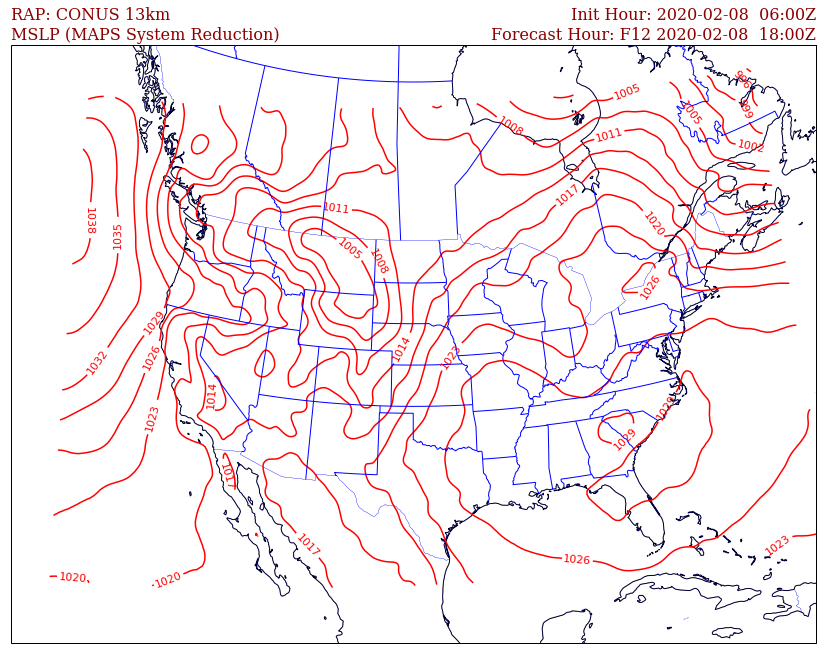

In [23]:
thredds.make_map(mslp,12,lats,lons,time_var[0],time_var[-1],font,model,variable,title_prod,filename_var,contourfill=False,
                cmap="nipy_spectral")

---
### Change model and product 

In [26]:
model_name = "GFS"
prod_name = "CONUS_20km"

In [29]:
data,model,title_prod = thredds.get_model_data("0600",model_name,prod_name,
                                               "MSLP_Eta_model_reduction_msl")

MSLP_Eta_model_reduction_msl
2020-02-08 06:00:00
Data grab complete!


In [30]:
mslp = data["MSLP_Eta_model_reduction_msl"][:]/100

In [31]:
lats = data["lat"][:]
lons = data["lon"][:]

In [38]:
time_var = thredds.get_time(data)
filename_var = "MSLP"
variable = data["MSLP_Eta_model_reduction_msl"].Grib2_Parameter_Name

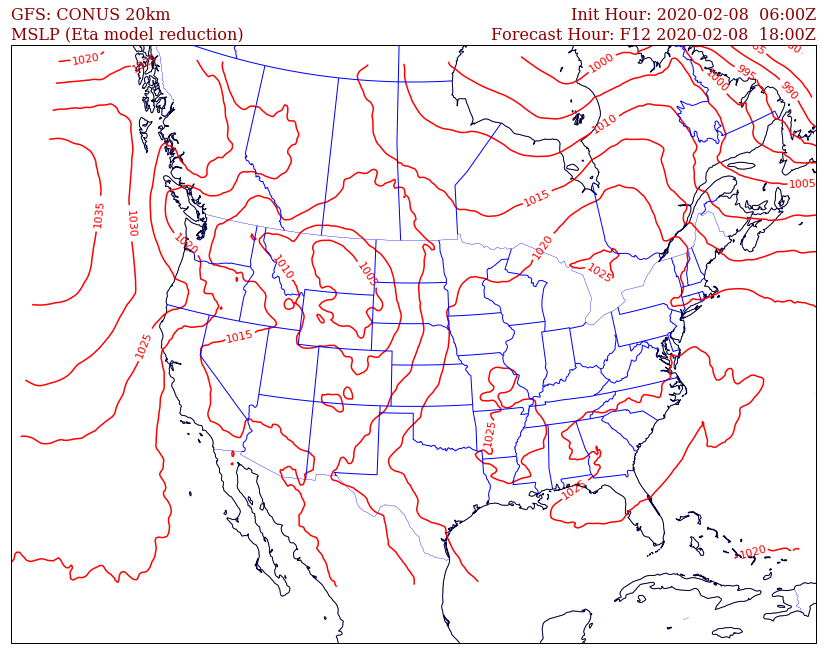

In [39]:
thredds.make_map(mslp,4,lats,lons,time_var[0],time_var[-1],font,model,variable,title_prod,filename_var,contourfill=False,
                cmap="nipy_spectral")